In [ ]:
""" expected event rate per day per 32.5 kilo ton assuming no oscillation 
(The value should be matched with 294.7 per day per 32.5 kilo ton) """

import numpy as np
from framework_pkg.framework import FrameWork



[294.63483945]


In [ ]:
""" expected event rate per day per 32.5 kilo ton assuming MSW
"""

from framework_pkg.survival_probablity import MSW 

def TotalB8MSW(param):
    survival_probability = MSW(param, frame.energy_nu)
    appearance = survival_probability 
    disappearance = (1 - survival_probability) 

    integral_electron = np.zeros(len(t_recoil))
    integral_moun = np.zeros(len(t_recoil))
    k = 0
    for i in range (len(t_recoil)):
        if t_recoil[i]<frame.energy_recoil[0]:
            integral_electron[i] = np.trapz(frame.spectrum_nu * electron_cross_section[i,:] * appearance, frame.energy_nu)
            integral_moun[i] = np.trapz(frame.spectrum_nu * moun_cross_section[i,:] * disappearance, frame.energy_nu)
        else:
            integral_electron[i] = np.trapz(frame.spectrum_nu[k:] * electron_cross_section[i,k:] * appearance[k:], frame.energy_nu[k:])
            integral_moun[i] = np.trapz(frame.spectrum_nu[k:] * moun_cross_section[i,k:] * disappearance[k:], frame.energy_nu[k:])
            k = k+1


    return total_days * total_volume * target_number * SNO_norm * np.trapz(integral_electron + integral_moun, t_recoil)
                                                                  

param = {'SinT12': 0.319, 'T13': 8.57, 'M12': 7.54e-5}
msw_expected_event = TotalB8MSW(param)
print(msw_expected_event)
print(msw_expected_event/mc_expected_event)
print()
param = {'SinT12': 0.308, 'T13': 8.57, 'M12': 6.9e-5}
msw_expected_event = TotalB8MSW(param)
print(msw_expected_event)
print(msw_expected_event/mc_expected_event)



139.30333178991089
0.4727999310991561

136.11080790000335
0.46196440365134805


In [19]:
import matplotlib.pyplot as plt

param = {'SinT12': 0.308, 'T13': 8.57, 'M12': 6.9e-5}
survival_probability = MSW(param, frame.energy_nu)


peanuts_B8 = np.loadtxt('Data/peanuts_B8.txt')
peanuts_B8M = np.loadtxt('Data/peanuts_B8M.txt')

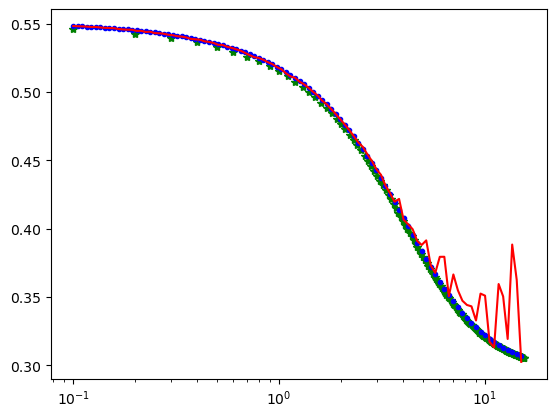

In [20]:
plt.xscale('log')
plt.plot(frame.energy_nu, survival_probability, 'g*')
plt.plot(peanuts_B8[:,0],peanuts_B8[:,1],'b.')
plt.plot(peanuts_B8M[:,0],peanuts_B8M[:,1],'r-')

In [11]:
print(peanuts_B8[:10,1])

[0.54830231 0.54799254 0.54765148 0.5472759  0.5468622  0.54640642
 0.54590412 0.54535041 0.54473983 0.5440663 ]


In [12]:
print(survival_probability[:10])

[0.54591101 0.54272735 0.53947574 0.53615788 0.53277581 0.52933186
 0.52582868 0.52226926 0.51865689 0.51499518]
